Device: cuda

BASELINE RESNET18 ON CIFAR-10

Loading CIFAR-10...


100%|██████████| 170M/170M [00:13<00:00, 12.7MB/s]


Training samples: 50000
Test samples: 10000

Building ResNet18...
Parameters: 11,181,642

TRAINING

Epoch 1/50


Train: 31.50% | Test: 41.66% | Best: 41.66%

Epoch 2/50


Train: 45.39% | Test: 51.15% | Best: 51.15%

Epoch 3/50


Train: 53.53% | Test: 53.70% | Best: 53.70%

Epoch 4/50


Train: 60.01% | Test: 64.14% | Best: 64.14%

Epoch 5/50


Train: 63.87% | Test: 64.51% | Best: 64.51%

Epoch 6/50


Train: 66.60% | Test: 62.83% | Best: 64.51%

Epoch 7/50


Train: 68.32% | Test: 67.29% | Best: 67.29%

Epoch 8/50


Train: 69.83% | Test: 70.63% | Best: 70.63%

Epoch 9/50


Train: 70.94% | Test: 71.58% | Best: 71.58%

Epoch 10/50


Train: 72.22% | Test: 72.46% | Best: 72.46%

Epoch 11/50


Train: 72.74% | Test: 69.43% | Best: 72.46%

Epoch 12/50


Train: 73.79% | Test: 71.62% | Best: 72.46%

Epoch 13/50


Train: 74.16% | Test: 70.93% | Best: 72.46%

Epoch 14/50


Train: 74.49% | Test: 70.37% | Best: 72.46%

Epoch 15/50


Train: 75.38% | Test: 75.50% | Best: 75.50%

Epoch 16/50


Train: 75.82% | Test: 72.51% | Best: 75.50%

Epoch 17/50


Train: 76.39% | Test: 74.00% | Best: 75.50%

Epoch 18/50


Train: 76.77% | Test: 76.00% | Best: 76.00%

Epoch 19/50


Train: 77.27% | Test: 74.83% | Best: 76.00%

Epoch 20/50


Train: 77.82% | Test: 73.93% | Best: 76.00%

Epoch 21/50


Train: 78.35% | Test: 74.58% | Best: 76.00%

Epoch 22/50


Train: 78.48% | Test: 74.71% | Best: 76.00%

Epoch 23/50


Train: 79.44% | Test: 77.89% | Best: 77.89%

Epoch 24/50


Train: 79.67% | Test: 74.31% | Best: 77.89%

Epoch 25/50


Train: 79.89% | Test: 76.75% | Best: 77.89%

Epoch 26/50


Train: 80.74% | Test: 78.64% | Best: 78.64%

Epoch 27/50


Train: 80.97% | Test: 79.14% | Best: 79.14%

Epoch 28/50


Train: 81.70% | Test: 77.53% | Best: 79.14%

Epoch 29/50


Train: 82.39% | Test: 80.53% | Best: 80.53%

Epoch 30/50


Train: 82.58% | Test: 80.63% | Best: 80.63%

Epoch 31/50


Train: 83.60% | Test: 81.78% | Best: 81.78%

Epoch 32/50


Train: 83.90% | Test: 80.78% | Best: 81.78%

Epoch 33/50


Train: 84.70% | Test: 81.42% | Best: 81.78%

Epoch 34/50


Train: 85.25% | Test: 83.07% | Best: 83.07%

Epoch 35/50


Train: 86.18% | Test: 82.37% | Best: 83.07%

Epoch 36/50


Train: 86.74% | Test: 82.94% | Best: 83.07%

Epoch 37/50


Train: 87.46% | Test: 82.75% | Best: 83.07%

Epoch 38/50


Train: 88.19% | Test: 84.05% | Best: 84.05%

Epoch 39/50


Train: 88.78% | Test: 84.22% | Best: 84.22%

Epoch 40/50


Train: 89.43% | Test: 85.02% | Best: 85.02%

Epoch 41/50


Train: 90.46% | Test: 84.76% | Best: 85.02%

Epoch 42/50


Train: 90.98% | Test: 85.37% | Best: 85.37%

Epoch 43/50


Train: 91.62% | Test: 85.96% | Best: 85.96%

Epoch 44/50


Train: 92.44% | Test: 86.33% | Best: 86.33%

Epoch 45/50


Train: 92.89% | Test: 86.01% | Best: 86.33%

Epoch 46/50


Train: 93.43% | Test: 86.63% | Best: 86.63%

Epoch 47/50


Train: 93.96% | Test: 86.64% | Best: 86.64%

Epoch 48/50


Train: 94.30% | Test: 86.81% | Best: 86.81%

Epoch 49/50


Train: 94.63% | Test: 86.78% | Best: 86.81%

Epoch 50/50


Train: 94.58% | Test: 86.85% | Best: 86.85%

BASELINE RESULTS
Best Test Accuracy: 86.85%
Final Test Accuracy: 86.85%
Training Time: 21.1 minutes


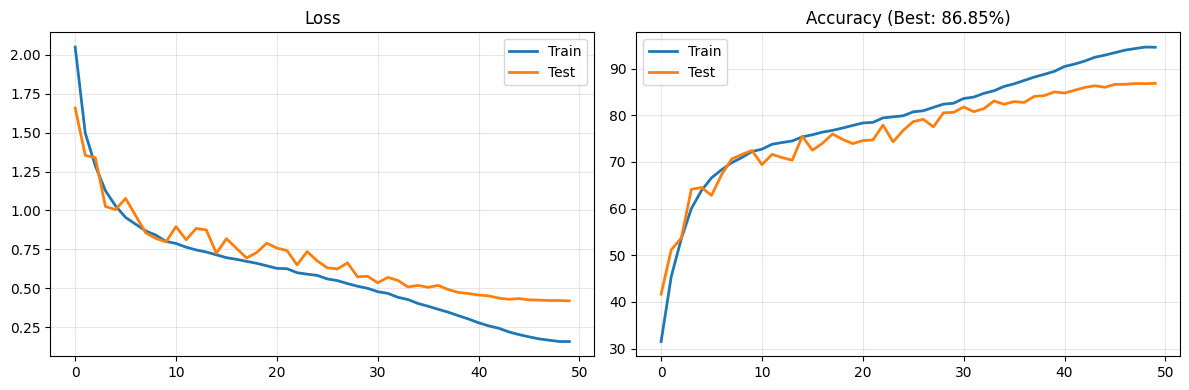

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ Baseline complete! Download the files.


In [1]:
# CIFAR-10 ResNet18 Baseline Model
# AI Final Project - Baseline Implementation

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import time
import json

# Reproducibility
torch.manual_seed(42)
np.random.seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Device: {device}")

# Hyperparameters
BATCH_SIZE = 128
LEARNING_RATE = 0.1
EPOCHS = 50
NUM_CLASSES = 10
WEIGHT_DECAY = 5e-4
MOMENTUM = 0.9

# CIFAR-10 normalization constants
CIFAR10_MEAN = (0.4914, 0.4822, 0.4465)
CIFAR10_STD = (0.2023, 0.1994, 0.2010)

print("\n" + "="*60)
print("BASELINE RESNET18 ON CIFAR-10")
print("="*60)

# Data transformations
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(CIFAR10_MEAN, CIFAR10_STD)
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(CIFAR10_MEAN, CIFAR10_STD)
])

# Load CIFAR-10
print("\nLoading CIFAR-10...")
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2, pin_memory=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
testloader = DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

print(f"Training samples: {len(trainset)}")
print(f"Test samples: {len(testset)}")

# Model
print("\nBuilding ResNet18...")
model = torchvision.models.resnet18(weights=None, num_classes=NUM_CLASSES)

# Initialize weights
def init_weights(m):
    if isinstance(m, nn.Conv2d):
        nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
    elif isinstance(m, nn.BatchNorm2d):
        nn.init.constant_(m.weight, 1)
        nn.init.constant_(m.bias, 0)
    elif isinstance(m, nn.Linear):
        nn.init.normal_(m.weight, 0, 0.01)
        nn.init.constant_(m.bias, 0)

model.apply(init_weights)
model = model.to(device)
print(f"Parameters: {sum(p.numel() for p in model.parameters()):,}")

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM, weight_decay=WEIGHT_DECAY)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=EPOCHS)

# Training function
def train_epoch(model, loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in tqdm(loader, desc="Training", leave=False):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    return running_loss / len(loader), 100. * correct / total

# Evaluation function
def evaluate(model, loader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in tqdm(loader, desc="Evaluating", leave=False):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    return running_loss / len(loader), 100. * correct / total

# Training loop
train_losses, train_accs = [], []
test_losses, test_accs = [], []
best_acc = 0

print("\n" + "="*60)
print("TRAINING")
print("="*60)

start_time = time.time()

for epoch in range(EPOCHS):
    print(f'\nEpoch {epoch+1}/{EPOCHS}')

    train_loss, train_acc = train_epoch(model, trainloader, criterion, optimizer, device)
    test_loss, test_acc = evaluate(model, testloader, criterion, device)
    scheduler.step()

    train_losses.append(train_loss)
    train_accs.append(train_acc)
    test_losses.append(test_loss)
    test_accs.append(test_acc)

    if test_acc > best_acc:
        best_acc = test_acc
        torch.save(model.state_dict(), 'baseline_best.pth')

    print(f'Train: {train_acc:.2f}% | Test: {test_acc:.2f}% | Best: {best_acc:.2f}%')

training_time = (time.time() - start_time) / 60

# Results
print("\n" + "="*60)
print("BASELINE RESULTS")
print("="*60)
print(f"Best Test Accuracy: {best_acc:.2f}%")
print(f"Final Test Accuracy: {test_accs[-1]:.2f}%")
print(f"Training Time: {training_time:.1f} minutes")
print("="*60)

# Save results
results = {
    'model': 'Baseline ResNet18',
    'best_test_acc': float(best_acc),
    'final_test_acc': float(test_accs[-1]),
    'final_train_acc': float(train_accs[-1]),
    'training_time_min': float(training_time),
    'test_accs': [float(x) for x in test_accs],
    'train_accs': [float(x) for x in train_accs]
}

with open('baseline_results.json', 'w') as f:
    json.dump(results, f, indent=2)

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(train_losses, label='Train', linewidth=2)
ax1.plot(test_losses, label='Test', linewidth=2)
ax1.set_title('Loss')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.plot(train_accs, label='Train', linewidth=2)
ax2.plot(test_accs, label='Test', linewidth=2)
ax2.set_title(f'Accuracy (Best: {best_acc:.2f}%)')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('baseline_results.png', dpi=300)
plt.show()

# Download
from google.colab import files
files.download('baseline_results.json')
files.download('baseline_results.png')

print("\n✅ Baseline complete! Download the files.")